In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report

from tensorflow import keras
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import load_model


import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/My Drive/thesis/data.csv')

In [2]:
# for anaconda
data=pd.read_csv(r'C:\Users\Asus\Downloads\Thesis\dataset\data.csv')

In [12]:
sampled_data = data.sample(n=5000, random_state=42)

In [4]:
sampled_data.head()

,FIT504,FIT401,FIT503,UV401_2,P501_2,PIT501,PIT503,FIT501,FIT502,P402_2,...,LIT401,MV304_2,AIT501,MV304_1,PIT502,AIT502,FIT301,P302_2,MV302_1,anomaly
693046,0.968680,0.989222,0.956915,1.0,1.0,0.928773,0.923433,0.989281,0.966895,1.0,...,0.877454,0.0,0.460236,1.0,0.323144,0.098584,0.927162,1.0,0.0,0.0
916789,0.972722,0.976684,0.959598,1.0,1.0,0.934097,0.925866,0.975208,0.953165,1.0,...,0.775993,0.0,0.450335,1.0,0.240175,0.910127,0.000000,0.0,1.0,1.0
292515,0.971509,0.978224,0.965633,1.0,1.0,0.953016,0.953930,0.978708,0.921565,1.0,...,0.767145,0.0,0.604918,1.0,0.283843,0.130668,0.000000,0.0,1.0,0.0
738953,0.000000,0.000000,0.001341,0.0,0.0,0.003445,0.001866,0.000510,0.000846,0.0,...,0.134079,1.0,0.162248,0.0,0.000000,0.490590,0.000000,0.0,1.0,1.0
748096,0.978986,0.973678,0.965968,1.0,1.0,0.947065,0.942494,0.971708,0.926644,1.0,...,0.258561,0.0,0.313638,1.0,0.262009,0.131924,0.927647,1.0,0.0,0.0


In [6]:
def create_3d_array(data, window_size):
    samples, features = data.shape
    new_samples = samples - window_size + 1

    # Initialize an empty array for the 3D data
    result = np.zeros((new_samples, window_size, features))

    # Populate the 3D array using a rolling window
    for i in range(new_samples):
        result[i, :, :] = data.iloc[i:i+window_size, :].values

    return result

In [ ]:
X.head()

,FIT504,FIT401,FIT503,UV401_2,P501_2,PIT501,PIT503,FIT501,FIT502,P402_2,...,LIT401,MV304_2,AIT501,MV304_1,PIT502,AIT502,FIT301,P302_2,MV302_1,anomaly
693046,0.968680,0.989222,0.956915,1.0,1.0,0.928773,0.923433,0.989281,0.966895,1.0,...,0.877454,0.0,0.460236,1.0,0.323144,0.098584,0.927162,1.0,0.0,0.0
916789,0.972722,0.976684,0.959598,1.0,1.0,0.934097,0.925866,0.975208,0.953165,1.0,...,0.775993,0.0,0.450335,1.0,0.240175,0.910127,0.000000,0.0,1.0,1.0
292515,0.971509,0.978224,0.965633,1.0,1.0,0.953016,0.953930,0.978708,0.921565,1.0,...,0.767145,0.0,0.604918,1.0,0.283843,0.130668,0.000000,0.0,1.0,0.0
738953,0.000000,0.000000,0.001341,0.0,0.0,0.003445,0.001866,0.000510,0.000846,0.0,...,0.134079,1.0,0.162248,0.0,0.000000,0.490590,0.000000,0.0,1.0,1.0
748096,0.978986,0.973678,0.965968,1.0,1.0,0.947065,0.942494,0.971708,0.926644,1.0,...,0.258561,0.0,0.313638,1.0,0.262009,0.131924,0.927647,1.0,0.0,0.0


In [4]:
X=sampled_data

In [7]:
window_size = 120
X_final_reshaped = create_3d_array(X, window_size)

In [8]:
y_final_reshaped = X_final_reshaped[:, :, -1:]
X_final_reshaped = X_final_reshaped[:, :, :-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_final_reshaped, y_final_reshaped, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79904, 120, 20)
(79904, 120, 1)
(19977, 120, 20)
(19977, 120, 1)


In [ ]:
window_size = X_train.shape[1]
number_of_features = X_train.shape[2]

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True, input_shape=(window_size, number_of_features)),
    tf.keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.RepeatVector(window_size),
    tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 64)             │          21,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 120, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 120, 32)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,393 (263.25 KB)

 Trainable params: 67,393 (263.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], verbose=1)

Epoch 1/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 316s 550ms/step - loss: 0.0550 - val_loss: 0.0543
Epoch 2/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 307s 546ms/step - loss: 0.0544 - val_loss: 0.0542
Epoch 3/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 322s 547ms/step - loss: 0.0545 - val_loss: 0.0542
Epoch 4/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 324s 551ms/step - loss: 0.0544 - val_loss: 0.0542
Epoch 5/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 322s 551ms/step - loss: 0.0544 - val_loss: 0.0540
Epoch 6/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 320s 548ms/step - loss: 0.0543 - val_loss: 0.0538
Epoch 7/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 302s 538ms/step - loss: 0.0540 - val_loss: 0.0534
Epoch 8/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 320s 533ms/step - loss: 0.0536 - val_loss: 0.0527
Epoch 9/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 320s 530ms/step - loss: 0.0527 - val_loss: 0.0508
Epoch 10/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 322s 530ms/step - loss: 0.0516 - val_loss: 0.0500
Epoch 11/100
562/562 ━━━━━━━━━━━━━━━━━━━━ 320s 528ms/step - loss: 0.0509 - val_loss: 0.04

In [ ]:
model.save('/content/drive/My Drive/thesis/lstm3.keras') #saved model i drive as lstm3

In [ ]:
y_pred = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step


In [ ]:
print(y_pred.shape)

print(X_test.shape)

(19977, 120, 1)
(19977, 120, 20)


In [ ]:
y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]
print(y_pred_final.shape)

print(y_test_final.shape)

(39977, 1)
(39977, 1)


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)

In [ ]:
threshold = np.percentile(mse, 95)
threshold

0.0014777449354558166

In [ ]:
y_pred = (mse > threshold).astype(int)

In [ ]:
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8428428428428428
Recall: 0.729004329004329
F1-score: 0.7818012999071495


In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9764729438854682
Confusion Matrix:
[[18665   157]
 [  313   842]]


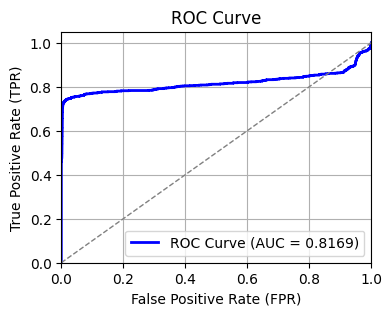

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### LSTM with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
window_size = X_train.shape[1]
number_of_features = X_train.shape[2]

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True, input_shape=(window_size, number_of_features)),
    tf.keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.RepeatVector(window_size),
    tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)
])

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, clipvalue=1.0)
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 64)             │          21,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 120, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 120, 32)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,393 (263.25 KB)

 Trainable params: 67,393 (263.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X_train_resampled.shape)

(150514, 120, 20)


In [ ]:
# Defining number_of_features before reshaping back to 3D
number_of_features = X_train.shape[2]

In [ ]:
# Flatten 3D training data to 2D for SMOTE
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Shape: (samples, window_size * features)
y_train_flattened = y_train[:, 0, 0]  # Flatten to 1D for SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_flattened, y_train_flattened)

# Define number_of_features before reshaping
number_of_features = X_train.shape[2]

# Reshape the oversampled data back to 3D for LSTM
X_train_resampled = X_train_smote.reshape(-1, window_size, number_of_features)  # Shape: (new_samples, window_size, features)
y_train_resampled = y_train_smote.reshape(-1, 1, 1)  # Shape: (new_samples, 1, 1)

# Check new shapes after SMOTE
print(X_train_resampled.shape)  # Should show increased samples
print(y_train_resampled.shape)


(150514, 120, 20)
(150514, 1, 1)


In [ ]:
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=128, validation_split=0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], verbose=1)

Epoch 1/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - loss: 0.1927 - val_loss: 0.0601
Epoch 2/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 0.0510 - val_loss: 0.1187
Epoch 3/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0416 - val_loss: 0.0293
Epoch 4/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - loss: 0.0403 - val_loss: 0.0515
Epoch 5/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.0362 - val_loss: 0.0339
Epoch 6/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 0.0333 - val_loss: 0.0539
Epoch 7/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 0.0313 - val_loss: 0.0260
Epoch 8/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 0.0282 - val_loss: 0.0164
Epoch 9/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 0.0270 - val_loss: 0.0119
Epoch 10/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 0.0260 - val_loss: 0.0150
Epoch 11/100
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 0.0241 - val_loss: 0.01

In [ ]:
model.save('/content/drive/My Drive/thesis/lstm_smote.keras') #saved model i drive as lstm3

In [ ]:
y_pred = model.predict(X_test)
y_test_final = y_test[:, 0, :]  # Adjusting shape for evaluation
y_pred_final = y_pred[:, 0, :]

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [ ]:
print(y_pred_final.shape)

print(y_test_final.shape)

(19977, 1)
(19977, 1)


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)

In [ ]:
# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 95)
threshold

0.04279529217114949

In [ ]:
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.46846846846846846
Recall: 0.4051948051948052
F1-score: 0.43454038997214484


In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8892226059968964
Confusion Matrix:
[[17294  1528]
 [  685   470]]


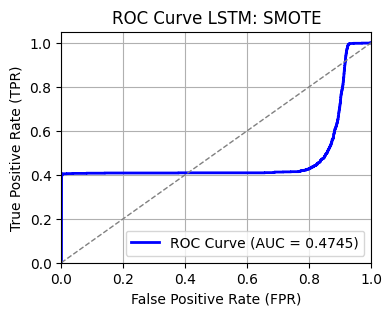

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve LSTM: SMOTE')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Optimization

**Grid** {'batch_size': 256, 'dropout_rate': 0.2, 'learning_rate': 0.001,'units': 64}  
**Random** {'batch_size': 128, 'dropout_rate': 0.1, 'learning_rate': 0.001,'units': 64}  
**Bayesian** {'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.00045953089995941953, 'batch_size': 64}  
**PSO** {'units_1': 61, 'units_2': 28, 'dropout_rate': 0.26, 'batch_size': 102, 'learning_rate': 0.0001}

### Grid Search

In [ ]:
# Define parameter grid
param_grid = {
    'units': [32, 64],
    'dropout_rate': [0.2, 0.5],
    'learning_rate': [0.001, 0.0001],
    'batch_size': [128, 256]
}

best_params = None
best_loss = float('inf')

In [ ]:
# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")

    # Build the model
    model = Sequential([
        LSTM(params['units'], activation='relu', input_shape=(timesteps, X_train.shape[2]), return_sequences=True),
        Dropout(params['dropout_rate']),
        LSTM(params['units'] // 2, activation='relu', return_sequences=False),
        RepeatVector(timesteps),
        LSTM(params['units'] // 2, activation='relu', return_sequences=True),
        Dropout(params['dropout_rate']),
        LSTM(params['units'], activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse')

    # Train the model
    history = model.fit(
        X_train, X_train,
        epochs=20,  # Fewer epochs for grid search
        batch_size=params['batch_size'],
        validation_split=0.2,
        shuffle=False,
        verbose=0
    )

    # Get validation loss from the last epoch
    val_loss = history.history['val_loss'][-1]
    print(f"Validation loss: {val_loss}")

    # Update best parameters
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

# Print best parameters and loss
print("Best Parameters:", best_params)
print("Best Validation Loss:", best_loss)

In [ ]:
gs_best_params = {
    'batch_size': 256,
    'dropout_rate': 0.2,
    'learning_rate': 0.001,
    'units': 64
}

In [ ]:
gs_best_params['units']//2

32

In [ ]:
window_size = X_train.shape[1]
number_of_features = X_train.shape[2]

grid_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True, input_shape=(window_size, number_of_features)),
    tf.keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.RepeatVector(window_size),
    tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
grid_model.compile(optimizer=optimizer, loss='mse')
grid_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 120, 64)             │          21,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 120, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 120, 32)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,393 (263.25 KB)

 Trainable params: 67,393 (263.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = grid_model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], verbose=1)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 248s 866ms/step - loss: 0.0563 - val_loss: 0.0544
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 258s 851ms/step - loss: 0.0548 - val_loss: 0.0543
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 254s 822ms/step - loss: 0.0545 - val_loss: 0.0542
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 266s 838ms/step - loss: 0.0546 - val_loss: 0.0542
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 277s 889ms/step - loss: 0.0547 - val_loss: 0.0542
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - loss: 0.0544 - val_loss: 0.0542
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - loss: 0.0545 - val_loss: 0.0540
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 312s 977ms/step - loss: 0.0543 - val_loss: 0.0540
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 318s 964ms/step - loss: 0.0543 - val_loss: 0.0539
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 309s 919ms/step - loss: 0.0541 - val_loss: 0.0537
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 258s 906ms/step - loss: 0.0540 - val_loss: 0.0534
Epoch 12/50
28

In [ ]:
grid_model.save('/content/drive/My Drive/thesis/lstm_grid.keras')

In [ ]:
from tensorflow.keras.models import load_model

lstm_grid = load_model(r'/content/drive/My Drive/thesis/lstm_grid.keras')

In [ ]:
X_train.size

191769600

In [ ]:
y_pred = lstm_grid.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 82ms/step


In [ ]:
y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]
print(y_pred_final.shape)

print(y_test_final.shape)

(19977, 1)
(19977, 1)


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)

# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 93)
threshold

0.004435674702330284

In [ ]:
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)

precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.825589706933524
Recall: 1.0
F1-score: 0.9044635865309318


In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9877859538469239
Confusion Matrix:
[[18578   244]
 [    0  1155]]


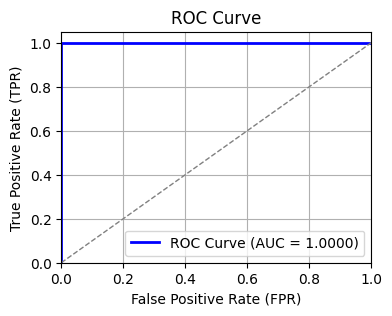

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Random Search

In [ ]:
# Define parameter ranges
param_dist = {
    'units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.5],
    'learning_rate': [0.001, 0.0001, 0.00001],
    'batch_size': [64, 128, 256]
}

In [ ]:
n_iter = 10  # Number of random combinations to try
best_params = None
best_loss = float('inf')

In [ ]:
for _ in range(n_iter):
    params = {key: random.choice(values) for key, values in param_dist.items()}
    print(f"Testing parameters: {params}")

    # Build and train the model
    model = Sequential([
        LSTM(params['units'], activation='relu', input_shape=(timesteps, X_train.shape[2]), return_sequences=True),
        Dropout(params['dropout_rate']),
        LSTM(params['units'] // 2, activation='relu', return_sequences=False),
        RepeatVector(timesteps),
        LSTM(params['units'] // 2, activation='relu', return_sequences=True),
        Dropout(params['dropout_rate']),
        LSTM(params['units'], activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(
        X_train, X_train,
        epochs=20,  # Fewer epochs for random search
        batch_size=params['batch_size'],
        validation_split=0.2,
        shuffle=False,
        verbose=0
    )

    val_loss = history.history['val_loss'][-1]
    print(f"Validation loss: {val_loss}")

    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Loss:", best_loss)

In [ ]:
rs_best_params = {
    'batch_size': 128,
    'dropout_rate': 0.1,
    'learning_rate': 0.001,
    'units': 64
}

In [ ]:
window_size = X_train.shape[1]
number_of_features = X_train.shape[2]

rs_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(rs_best_params['units'], activation='tanh', return_sequences=True, input_shape=(window_size, number_of_features)),
    tf.keras.layers.LSTM(rs_best_params['units']//2, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(rs_best_params['dropout_rate']),
    tf.keras.layers.RepeatVector(window_size),
    tf.keras.layers.LSTM(rs_best_params['units']//2, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(rs_best_params['units'], activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(rs_best_params['dropout_rate']),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(rs_best_params['learning_rate'], clipvalue=1.0)
rs_model.compile(optimizer=optimizer, loss='mse')
rs_model.summary()

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 120, 64)        │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_7 (RepeatVector)  │ (None, 120, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 120, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 120, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 120, 1)         │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,393 (263.25 KB)

 Trainable params: 67,393 (263.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = rs_model.fit(X_train, y_train, epochs=50, batch_size=rs_best_params['batch_size'], validation_split=0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], verbose=1)

Epoch 1/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 187s 322ms/step - loss: 0.0554 - val_loss: 0.0542
Epoch 2/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 191s 340ms/step - loss: 0.0546 - val_loss: 0.0542
Epoch 3/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 191s 339ms/step - loss: 0.0545 - val_loss: 0.0542
Epoch 4/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 192s 341ms/step - loss: 0.0544 - val_loss: 0.0541
Epoch 5/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 196s 349ms/step - loss: 0.0543 - val_loss: 0.0538
Epoch 6/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 194s 346ms/step - loss: 0.0540 - val_loss: 0.0534
Epoch 7/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 186s 331ms/step - loss: 0.0536 - val_loss: 0.0526
Epoch 8/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 186s 331ms/step - loss: 0.0529 - val_loss: 0.0521
Epoch 9/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 186s 331ms/step - loss: 0.0526 - val_loss: 0.0517
Epoch 10/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 189s 335ms/step - loss: 0.0522 - val_loss: 0.0512
Epoch 11/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 189s 336ms/step - loss: 0.0515 - val_loss: 0.0497
Epoch 12

In [ ]:
y_pred = rs_model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step


In [ ]:
y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]
print(y_pred_final.shape)

print(y_test_final.shape)

(19977, 1)
(19977, 1)


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)

# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 95)
threshold

0.8478645080618891

In [ ]:
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)

precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 1.0
Recall: 0.8649350649350649
F1-score: 0.9275766016713092


In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9921910196726235
Confusion Matrix:
[[18822     0]
 [  156   999]]


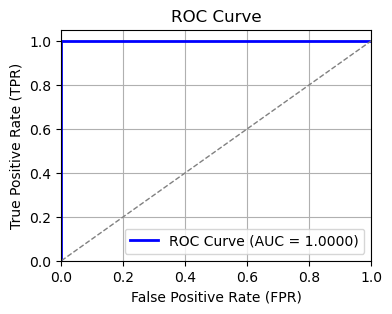

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Save the final model
rs_model.save(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\rs_lstm.keras')

In [ ]:
rs_best_params

{'batch_size': 128, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'units': 64}

### Bayesian

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    units = trial.suggest_int('units', 32, 128, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    batch_size = trial.suggest_categorical('batch_size', [64, 128, 256])

    # Build the model
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(timesteps, X_train.shape[2]), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units // 2, activation='relu', return_sequences=False),
        RepeatVector(timesteps),
        LSTM(units // 2, activation='relu', return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Train the model
    history = model.fit(
        X_train, X_train,
        epochs=20,
        batch_size=batch_size,
        validation_split=0.2,
        shuffle=False,
        verbose=0
    )

    # Return validation loss
    return history.history['val_loss'][-1]

# Create study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print best parameters
print("Best Parameters:", study.best_params)
print("Best Validation Loss:", study.best_value)

In [ ]:
bs_best_params = {'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.00045953089995941953, 'batch_size': 64}

In [ ]:
window_size = X_train.shape[1]
number_of_features = X_train.shape[2]

bs_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(bs_best_params['units'], activation='tanh', return_sequences=True, input_shape=(window_size, number_of_features)),
    tf.keras.layers.LSTM(bs_best_params['units']//2, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(bs_best_params['dropout_rate']),
    tf.keras.layers.RepeatVector(window_size),
    tf.keras.layers.LSTM(bs_best_params['units']//2, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(bs_best_params['units'], activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(bs_best_params['dropout_rate']),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(bs_best_params['learning_rate'], clipvalue=1.0)
bs_model.compile(optimizer=optimizer, loss='mse')
bs_model.summary()

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 120, 128)       │        76,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_8 (RepeatVector)  │ (None, 120, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 120, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 120, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 120, 1)         │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,665 (1006.50 KB)

 Trainable params: 257,665 (1006.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = bs_model.fit(X_train, y_train, epochs=50, batch_size=bs_best_params['batch_size'], validation_split=0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], verbose=1)

Epoch 1/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 766s 676ms/step - loss: 0.0550 - val_loss: 0.0542
Epoch 2/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 719s 640ms/step - loss: 0.0545 - val_loss: 0.0540
Epoch 3/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 730s 650ms/step - loss: 0.0543 - val_loss: 0.0535
Epoch 4/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 691s 615ms/step - loss: 0.0537 - val_loss: 0.0529
Epoch 5/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 690s 614ms/step - loss: 0.0528 - val_loss: 0.0515
Epoch 6/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 691s 615ms/step - loss: 0.0520 - val_loss: 0.0502
Epoch 7/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 690s 614ms/step - loss: 0.0512 - val_loss: 0.0492
Epoch 8/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 692s 616ms/step - loss: 0.0508 - val_loss: 0.0485
Epoch 9/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 685s 610ms/step - loss: 0.0503 - val_loss: 0.0478
Epoch 10/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 689s 613ms/step - loss: 0.0500 - val_loss: 0.0485
Epoch 11/50
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 694s 617ms/step - loss: 0.0507 - val

In [ ]:
# Save the final model
bs_model.save(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\bs_lstm.keras')

In [ ]:
y_pred = bs_model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.shape

(19977, 120, 1)

In [ ]:
y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]
print(y_pred_final.shape)

print(y_test_final.shape)

(19977, 1)
(19977, 1)


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)

# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 95)
threshold

#0.8989490184036354 Random Search

0.8854914654010939

In [ ]:
y_pred_final.shape

(19977, 1)

In [ ]:
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)

precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 1.0000
Recall: 0.8649
F1-score: 0.9276


In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9922
Confusion Matrix:
[[18822     0]
 [  156   999]]


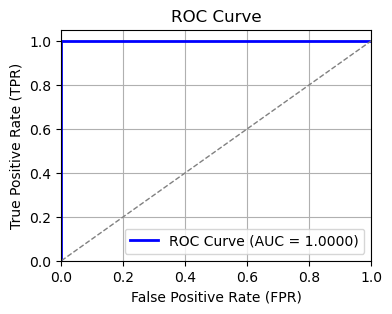

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Different Splitting

### k-fold cross validation

In [ ]:
#download the best performiing model
lstm = load_model(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\gs_lstm.keras')

In [3]:
sampled_data = data.sample(n=5000, random_state=42)

In [9]:
print(X_final_reshaped.shape)
print(y_final_reshaped.shape)

(4881, 120, 20)
(4881, 120, 1)


In [11]:
grid = load_model(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\gs_lstm.keras')
random = load_model(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\rs_lstm.keras')
pso = load_model(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\pso_lstm.keras')
bayes = load_model(r'C:\Users\Asus\Downloads\Thesis\models\model\lstm\bs_lstm.keras')

In [13]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store AUC scores for each model
auc_scores_model_1 = []
auc_scores_model_2 = []
auc_scores_model_3 = []
auc_scores_model_4 = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_final_reshaped):
    X_train, X_test = X_final_reshaped[train_index], X_final_reshaped[test_index]
    y_train, y_test = y_final_reshaped[train_index], y_final_reshaped[test_index]

    # PSO
    y_pred_1 = pso.predict(X_test)
    y_test_final_1 = y_test[:, 0, :]
    y_pred_final_1 = y_pred_1[:, 0, :]
    fpr_1, tpr_1, _ = roc_curve(y_test_final_1.ravel(), y_pred_final_1.ravel())
    auc_scores_model_1.append(auc(fpr_1, tpr_1))

    # Grid
    y_pred_2 = grid.predict(X_test)
    y_test_final_2 = y_test[:, 0, :]
    y_pred_final_2 = y_pred_2[:, 0, :]
    fpr_2, tpr_2, _ = roc_curve(y_test_final_2.ravel(), y_pred_final_2.ravel())
    auc_scores_model_2.append(auc(fpr_2, tpr_2))

    # Random
    y_pred_3 = random.predict(X_test)
    y_test_final_3 = y_test[:, 0, :]
    y_pred_final_3 = y_pred_3[:, 0, :]
    fpr_3, tpr_3, _ = roc_curve(y_test_final_3.ravel(), y_pred_final_3.ravel())
    auc_scores_model_3.append(auc(fpr_3, tpr_3))

    # Bayesian
    y_pred_4 = bayes.predict(X_test)
    y_test_final_4 = y_test[:, 0, :]
    y_pred_final_4 = y_pred_4[:, 0, :]
    fpr_4, tpr_4, _ = roc_curve(y_test_final_4.ravel(), y_pred_final_4.ravel())
    auc_scores_model_4.append(auc(fpr_4, tpr_4))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

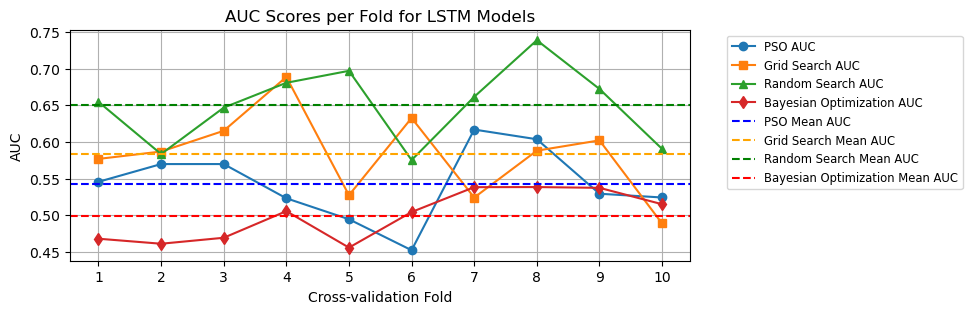

In [16]:
# Plotting the AUC scores for each model
plt.figure(figsize=(8, 3))
folds = list(range(1, len(auc_scores_model_1) + 1))

# Plot AUC scores for each model
plt.plot(folds, auc_scores_model_1, marker='o', label='PSO AUC')
plt.plot(folds, auc_scores_model_2, marker='s', label='Grid Search AUC')
plt.plot(folds, auc_scores_model_3, marker='^', label='Random Search AUC')
plt.plot(folds, auc_scores_model_4, marker='d', label='Bayesian Optimization AUC')

# Add mean AUC as horizontal lines
plt.axhline(np.mean(auc_scores_model_1), color='blue', linestyle='--', label='PSO Mean AUC')
plt.axhline(np.mean(auc_scores_model_2), color='orange', linestyle='--', label='Grid Search Mean AUC')
plt.axhline(np.mean(auc_scores_model_3), color='green', linestyle='--', label='Random Search Mean AUC')
plt.axhline(np.mean(auc_scores_model_4), color='red', linestyle='--', label='Bayesian Optimization Mean AUC')

# Customize plot
plt.xlabel('Cross-validation Fold')
plt.ylabel('AUC')
plt.title('AUC Scores per Fold for LSTM Models')
plt.xticks(folds)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)

plt.show()

### k-fold cross validation for specific optimization

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
import tensorflow as tf
from sklearn.model_selection import KFold

In [ ]:
# y_final_reshaped = X_final_reshaped[:, :, -1:]
# X_final_reshaped = X_final_reshaped[:, :, :-1]

In [ ]:
print(X_final_reshaped.shape)
print(y_final_reshaped.shape)

(99881, 120, 20)
(99881, 120, 1)


In [ ]:
X = sampled_data.drop(columns=['anomaly'])
y = sampled_data['anomaly']

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

auc_scores = []
fold_predictions = []

for train_index, test_index in kf.split(X_final_reshaped):
    X_train, X_test = X_final_reshaped[train_index], X_final_reshaped[test_index]
    y_train, y_test = y_final_reshaped[train_index], y_final_reshaped[test_index]

    # Get predictions
    y_pred = lstm.predict(X_test)

    # Reshape or slice predictions and actuals if needed
    y_test_final = y_test[:,0,:]
    y_pred_final = y_pred[:,0,:]

    # Calculate AUC or other performance metrics
    fpr, tpr, _ = roc_curve(y_test_final.ravel(), y_pred_final.ravel())  # Ensure flattening if required for roc_curve
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    fold_predictions.append((fpr, tpr))

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step


AUC Scores per Fold: [0.5789318422759466, 0.5778614462163313, 0.5738095883153319, 0.5537991579640605, 0.572044923868822, 0.5724946312815997, 0.557742925110477, 0.5683875687109627, 0.5973813759518842, 0.5865872133769164]
Average AUC: 0.5739040673072333


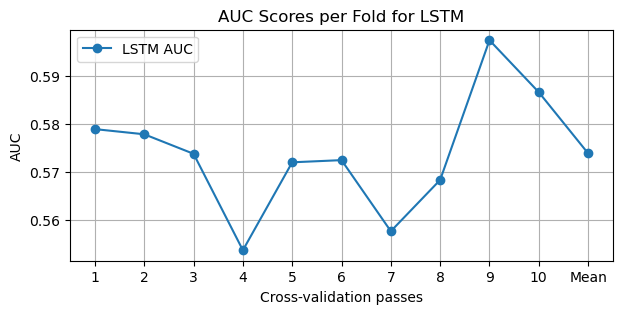

In [ ]:
# Output the results
print("AUC Scores per Fold:", auc_scores)
print("Average AUC:", np.mean(auc_scores))

plt.figure(figsize=(7, 3))
plt.plot(range(1, 12), auc_scores + [np.mean(auc_scores)], marker='o', label='LSTM AUC')
plt.xticks(list(range(1, 12)), labels=list(range(1, 11)) + ['Mean'])
plt.xlabel('Cross-validation passes')
plt.ylabel('AUC')
plt.title('AUC Scores per Fold for LSTM')
plt.legend()
plt.grid(True)
plt.show()

### 90/10 Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final_reshaped, y_final_reshaped, test_size=0.1, random_state=42)

In [ ]:
y_pred = lstm.predict(X_test)

y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)
# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 95)
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)

Precision: 1.0
Recall: 0.8880994671403197
F1-score: 0.940733772342427


In [ ]:
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 1.0
Recall: 0.8880994671403197
F1-score: 0.940733772342427
Accuracy: 0.9936930623686054
Confusion Matrix:
[[9426    0]
 [  63  500]]


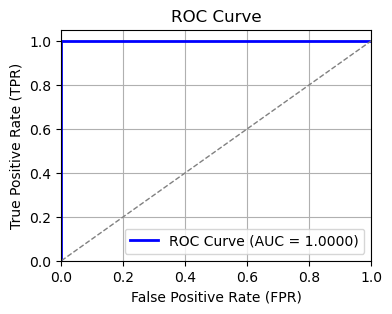

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 60/40 Test Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final_reshaped, y_final_reshaped, test_size=0.4, random_state=42)

In [ ]:
y_pred = lstm.predict(X_test)

y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]

1249/1249 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)
# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 95)
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)

print(f"60/40 threshold: {threshold}")

60/40 threshold: 0.898055354795981


In [ ]:
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 1.0
Recall: 0.8844621513944223
F1-score: 0.9386892177589852
Accuracy: 0.9934673241058244
Confusion Matrix:
[[37694     0]
 [  261  1998]]


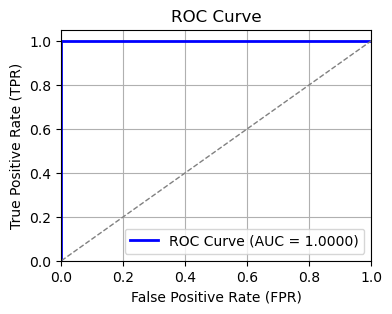

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 70/30 Test Splittig

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final_reshaped, y_final_reshaped, test_size=0.3, random_state=42)

In [ ]:
y_pred = lstm.predict(X_test)

y_test_final = y_test[:,0,:]
y_pred_final = y_pred[:,0,:]

937/937 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step


In [ ]:
mse = np.mean(np.power(y_test_final - y_pred_final, 2), axis=1)
# Set a threshold for identifying anomalies
threshold = np.percentile(mse, 95)
# Classify data points as normal (0) or anomaly (1) based on the threshold
y_pred = (mse > threshold).astype(int)

print(f"70/30 threshold: {threshold}")

70/30 threshold: 0.8984309770943312


In [ ]:
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

# Print all evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test_final, y_pred)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 1.0
Recall: 0.8720186154741129
F1-score: 0.9316345556246116
Accuracy: 0.9926581011179709
Confusion Matrix:
[[28246     0]
 [  220  1499]]


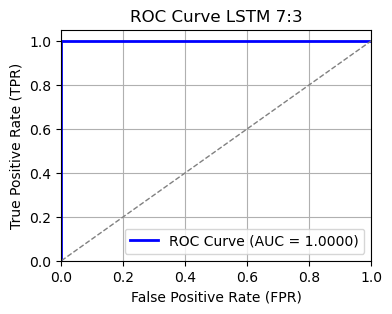

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, mse)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve LSTM 7:3')
plt.legend(loc="lower right")
plt.grid()
plt.show()